In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from helper import *

In [2]:
df_arma_fogo = pd.read_csv('./data/gold/suicidio_armas.csv')
df_perfuro_cortante = pd.read_csv('./data/gold/suicidio_perfuro.csv')
df_sufocamento = pd.read_csv('./data/gold/suicidio_sufoc.csv')

In [12]:
df_sufocamento.columns

Index(['data_obito', 'causa_morte', 'sexo', 'escolaridade', 'raca_cor',
       'estado_civil', 'idade_momento_obito'],
      dtype='object')

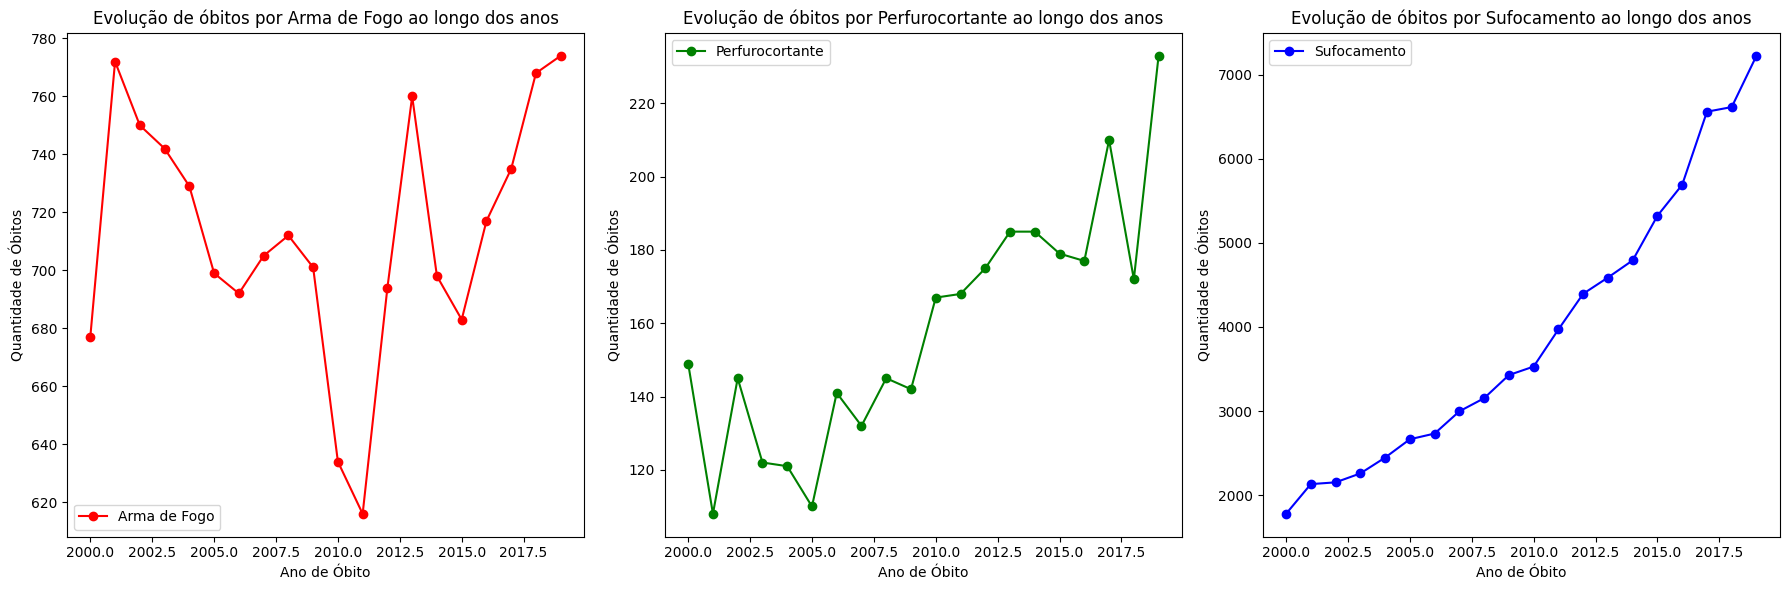

In [3]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_evolution(axes[0], df_arma_fogo, 'Arma de Fogo', 'red')
plot_evolution(axes[1], df_perfuro_cortante, 'Perfurocortante', 'green')
plot_evolution(axes[2], df_sufocamento, 'Sufocamento', 'blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

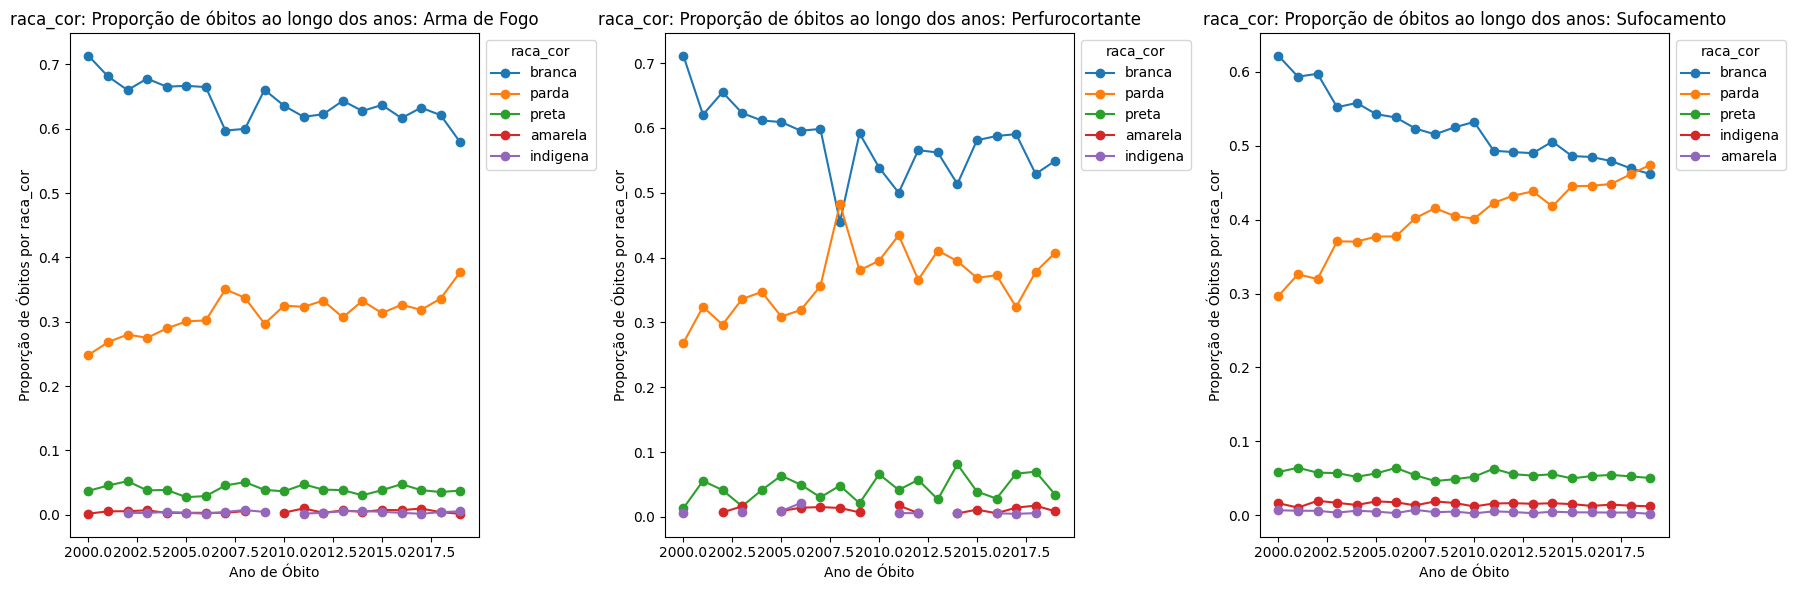

In [4]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_proportion_per_years(ax=axes[0], df=df_arma_fogo, column='raca_cor', category='Arma de Fogo', color='red')
plot_proportion_per_years(ax=axes[1], df=df_perfuro_cortante, column='raca_cor', category='Perfurocortante', color='green')
plot_proportion_per_years(ax=axes[2], df=df_sufocamento, column='raca_cor', category='Sufocamento', color='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

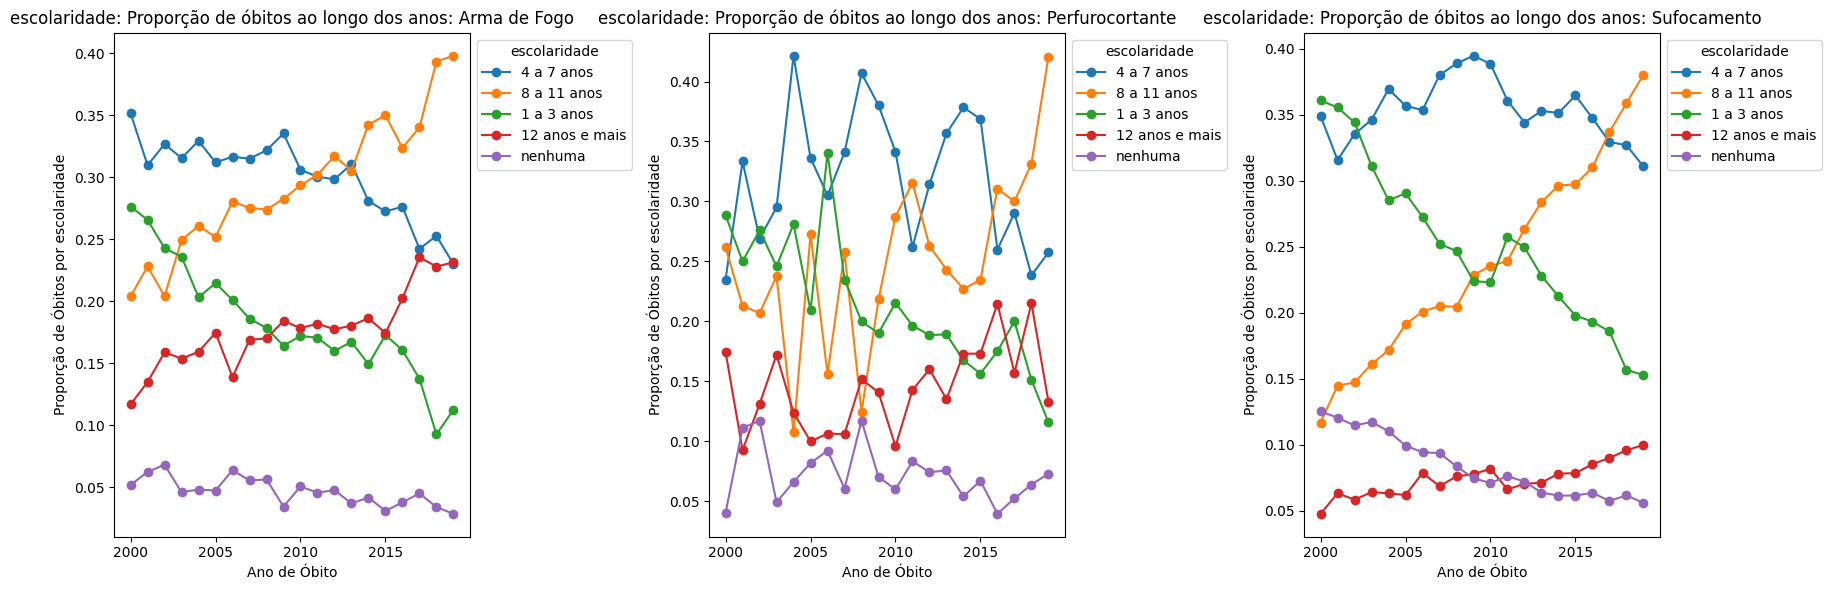

In [5]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_proportion_per_years(ax=axes[0], df=df_arma_fogo, column='escolaridade', category='Arma de Fogo', color='red')
plot_proportion_per_years(ax=axes[1], df=df_perfuro_cortante,column='escolaridade', category='Perfurocortante', color='green')
plot_proportion_per_years(ax=axes[2], df=df_sufocamento, column='escolaridade', category='Sufocamento', color='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

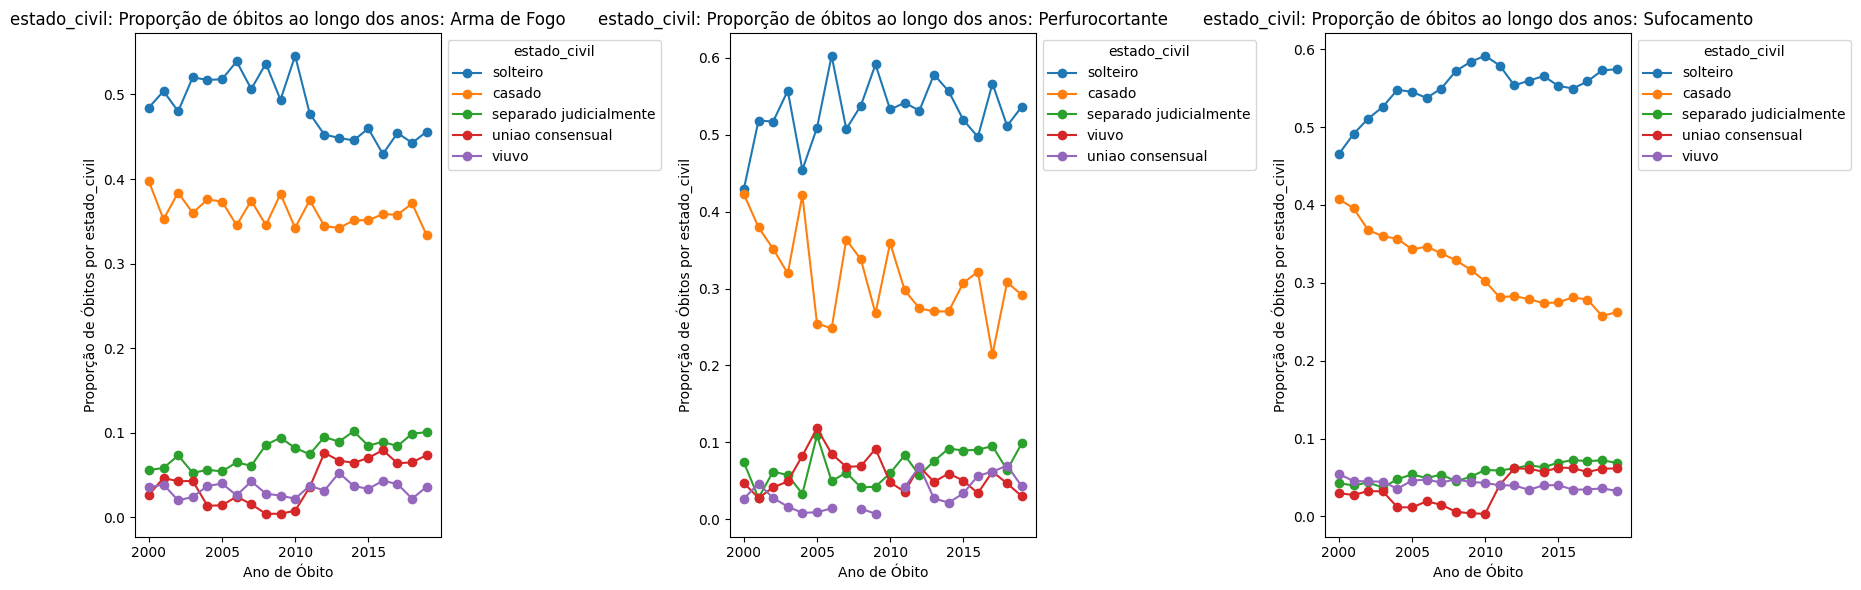

In [6]:
# Criando subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_proportion_per_years(ax=axes[0], df=df_arma_fogo, column='estado_civil', category='Arma de Fogo', color='red')
plot_proportion_per_years(ax=axes[1], df=df_perfuro_cortante, column='estado_civil', category='Perfurocortante', color='green')
plot_proportion_per_years(ax=axes[2], df=df_sufocamento, column='estado_civil', category='Sufocamento', color='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos

plt.show()

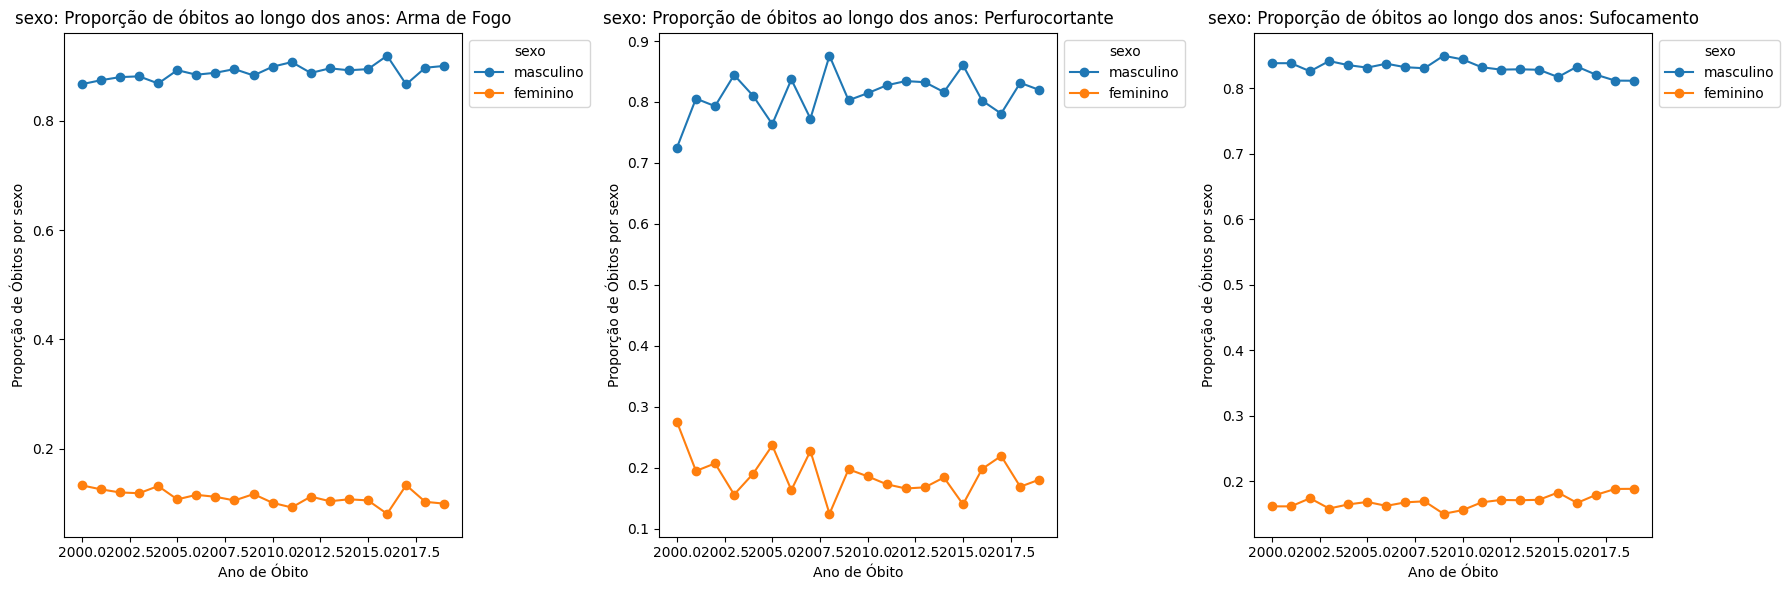

In [7]:
# Criando| subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_proportion_per_years(ax=axes[0], df=df_arma_fogo, column='sexo', category='Arma de Fogo', color='red')
plot_proportion_per_years(ax=axes[1], df=df_perfuro_cortante, column='sexo', category='Perfurocortante', color='green')
plot_proportion_per_years(ax=axes[2], df=df_sufocamento, column='sexo', category='Sufocamento', color='blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

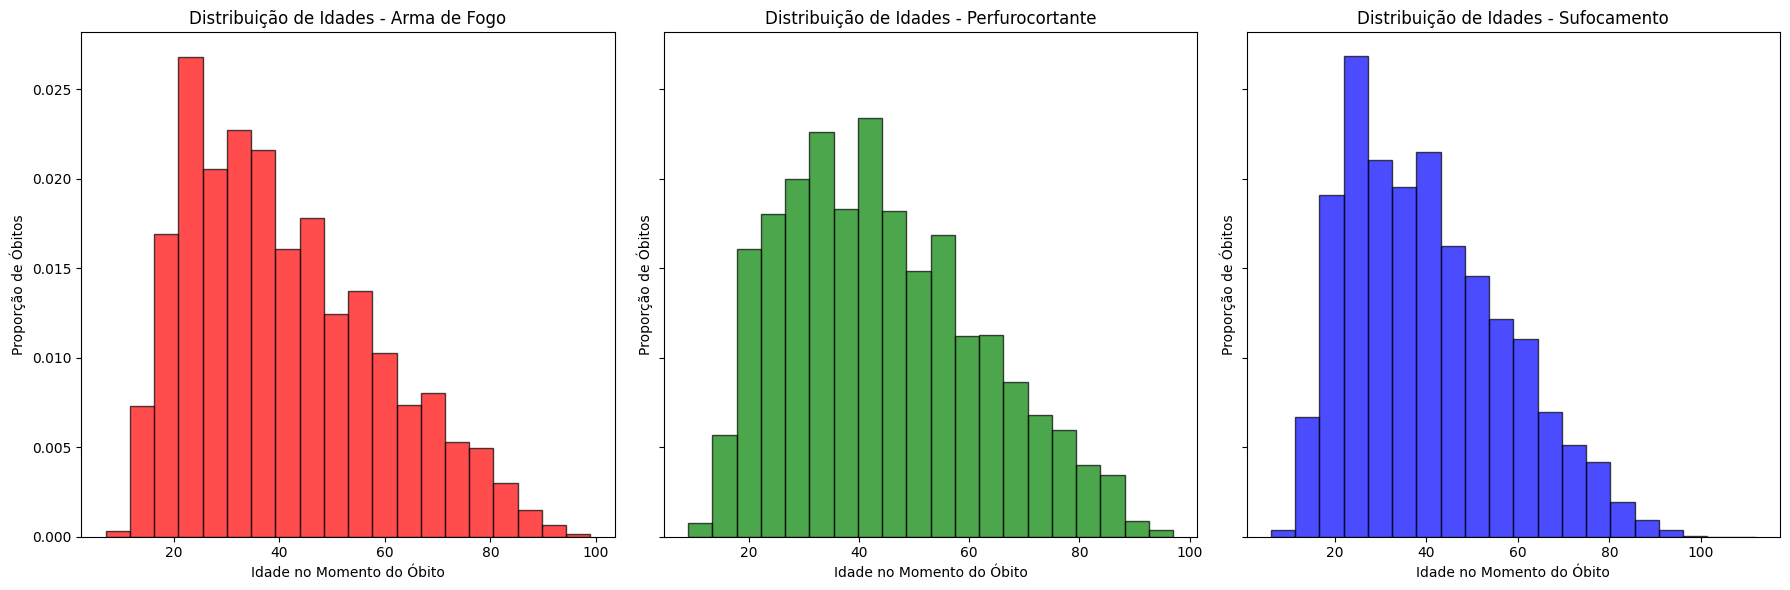

In [8]:
# Criando subplots com mesma escala no eixo y
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Chamando a função para cada categoria e associando ao subplot correspondente
plot_age_distribution(axes[0], df_arma_fogo, 'Arma de Fogo', 'red')
plot_age_distribution(axes[1], df_perfuro_cortante, 'Perfurocortante', 'green')
plot_age_distribution(axes[2], df_sufocamento, 'Sufocamento', 'blue')

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()